# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('sp.csv', delimiter=';')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


2 columns with Month and Passengers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


# Change Month to datetime

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


# Check any null values

In [7]:
df.isnull().values.any()

False

# Transform data

In [8]:
# This gets rid of the 1st column being the index
df = df.set_index(['Month'])


In [9]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
ts = df['#Passengers']

In [11]:
type(ts)

pandas.core.series.Series

In [12]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

# Visualize the Data

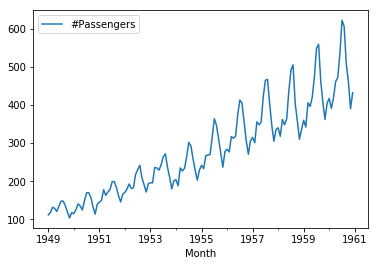

In [13]:
df.plot()

It is clear that passenger numbers are going up significantly 

# Decomposition 

It is the breaking down of something complex into its components 

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [17]:
decomposition = seasonal_decompose(df)

In [18]:
decomposed

# Create 3 varialbes: trend, seasonality & residual

In [20]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


#Create three variables called trend, seasonal, and residual and set them equal to the values of decomposition.trend, decomposition.seasonal, and decomposition.resid respectively

# Visualize Decomposition

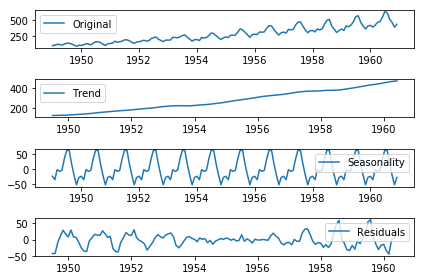

In [21]:
plt.subplot(411)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

Trend indicates a linear increase in passengers 
Seasonality indicates that Summer is very high 


# Model Build: Testing for Stationarity

Stationarity = A time series has stationarity if a shift in 
time doesn’t cause a change in the shape of the distribution.
Basic properties of the distribution like the mean , variance 
and covariance are constant over time.\


# Why is Statitionarity important?

Most forecasting methods assume that a distribution has stationarity. 
For example, autocovariance and autocorrelations rely on the assumption of stationarity. An absence of stationarity can cause unexpected or bizarre behaviors, like t-ratios not following a t-distribution or high r-squared values 
assigned to variables that aren’t correlated at all.

# Run a KPSS Test 

In [22]:
from statsmodels.tsa.stattools import kpss

In [23]:
kpss(ts)

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.0521750110135093,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

From documentation https://www.statsmodels.org/0.8.0/generated/statsmodels.tsa.stattools.kpss.html   shows the p_value is 0.01 which is less than 0.05 so it is not stationarity

# Transform data to Stationarity

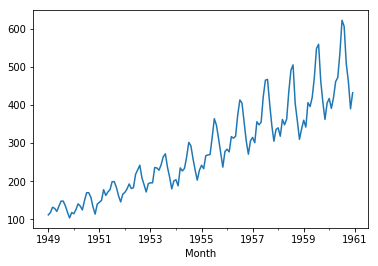

In [24]:
ts.plot()

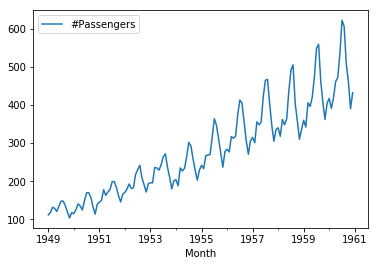

In [25]:
df.plot()

Looking at the data it indicates that variance increases as time goes on
and the mean also increases as time goes on.

# Logarithms = 2topower3 = 8

bp = n

p = logarithm

2 =64 what is the power, what is the log

log2 = 64 = 6 

Useful with dealing with very big and very small numbers

# Change data to logarithm 

In [27]:
ts_log = np.log(ts)

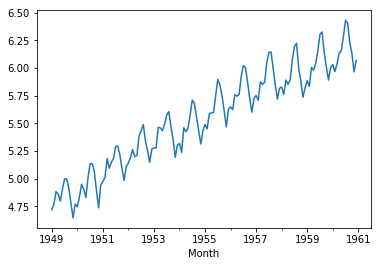

In [28]:
ts_log.plot()

Variance has decreased

# Construct a constant mean 

In [29]:
ts_log.diff().head()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: #Passengers, dtype: float64

# Use the diff() method to get the difference between our values

In [34]:
#Differencing makes more null values
ts_log.diff().dropna()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
1949-12-01    0.126294
1950-01-01   -0.025752
1950-02-01    0.091350
1950-03-01    0.112478
1950-04-01   -0.043485
1950-05-01   -0.076961
1950-06-01    0.175633
1950-07-01    0.131852
1950-08-01    0.000000
1950-09-01   -0.073203
1950-10-01   -0.172246
1950-11-01   -0.154151
1950-12-01    0.205444
1951-01-01    0.035091
1951-02-01    0.033902
1951-03-01    0.171148
1951-04-01   -0.088033
1951-05-01    0.053744
1951-06-01    0.034289
1951-07-01    0.111521
                ...   
1958-07-01    0.121098
1958-08-01    0.028114
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-

In [31]:
kpss(ts_log.diff().dropna())

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.10154458687402597,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# The output is greater than 0.1 hence it is now stationarity

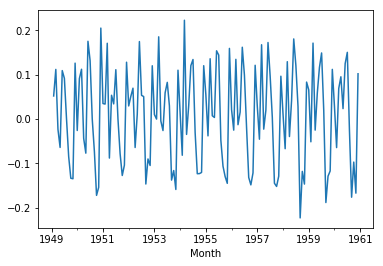

In [33]:
ts_log.diff().plot()

# ARIMA Model 

Time Series model is able to forecast future events using historical data

ARIMA Model is AutoRegressive Integrated Moving Average 

ARIMA(p,d,q) forecasting equation: ARIMA models are, in theory, the most general class of models for forecasting a time series which can be made to be “stationary” by differencing (if necessary), perhaps in conjunction with nonlinear transformations such as logging or deflating (if necessary). A random variable that is a time series is stationary if its statistical properties are all constant over time.  A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion, i.e., its short-term random time patterns always look the same in a statistical sense.  The latter condition means that its autocorrelations (correlations with its own prior deviations from the mean) remain constant over time, or equivalently, that its power spectrum remains constant over time.  A random variable of this form can be viewed (as usual) as a combination of signal and noise, and the signal (if one is apparent) could be a pattern of fast or slow mean reversion, or sinusoidal oscillation, or rapid alternation in sign, and it could also have a seasonal component.  An ARIMA model can be viewed as a “filter” that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

In [37]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [38]:
# This method finds the MSE of a single ARIMA model.
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) # Needs to be an integer because it is later used as an index.
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model.
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
    # This method evaluates ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [39]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [40]:
evaluate_models(ts, p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=11363.173
ARIMA(0, 1, 1) MSE=2481.165
ARIMA(0, 1, 2) MSE=2715.699
ARIMA(0, 2, 1) MSE=2890.540
ARIMA(0, 2, 2) MSE=2550.209
ARIMA(1, 0, 0) MSE=2758.993
ARIMA(1, 0, 1) MSE=2452.351
ARIMA(1, 0, 2) MSE=2666.391
ARIMA(1, 1, 0) MSE=2525.942
ARIMA(1, 1, 1) MSE=2570.442
ARIMA(1, 2, 0) MSE=3762.605
ARIMA(2, 0, 0) MSE=2460.097
ARIMA(2, 0, 1) MSE=2490.265


C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARIMA(2, 1, 0) MSE=2458.063
ARIMA(2, 1, 1) MSE=1727.584
ARIMA(2, 1, 2) MSE=1755.072
ARIMA(2, 2, 0) MSE=3757.908


C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 2, 2) MSE=2591.334
Best ARIMA(2, 1, 1) MSE=1727.584


In [41]:
p=2
d=1
q=1
model = ARIMA(ts, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


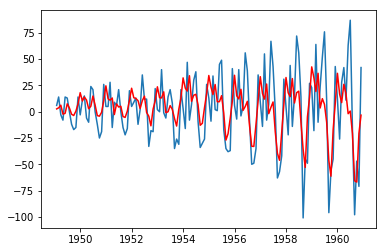

In [42]:
plt.plot(ts.diff())
plt.plot(model_fit.predict(), color = 'red')

In [44]:
periods_to_forecast = 24

In [45]:
# Create a range of future dates that is the length of
# the periods you've chosen to forecast
date_range = pd.date_range(ts.index[-1], periods = periods_to_forecast,
              freq='MS').strftime("%Y-%m-%d").tolist()

# Turn that range into a dataframe that includes your predictions
future_months = pd.DataFrame(date_range, columns = ['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)

In [46]:
future_months['Prediction'] = forecast[0]

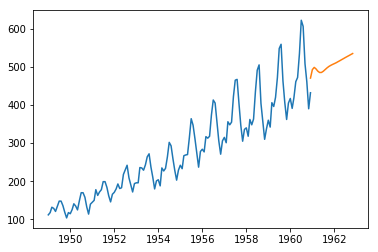

In [47]:
plt.plot(ts)
plt.plot(future_months)
plt.show()

In [48]:
print(future_months)

            Prediction
Month                 
1960-12-01  470.456796
1961-01-01  492.571731
1961-02-01  498.449311
1961-03-01  494.736992
1961-04-01  488.721966
1961-05-01  485.058545
1961-06-01  485.167143
1961-07-01  488.240851
1961-08-01  492.663692
1961-09-01  497.063027
1961-10-01  500.747849
1961-11-01  503.655657
1961-12-01  506.070104
1962-01-01  508.336317
1962-02-01  510.690636
1962-03-01  513.217901
1962-04-01  515.891179
1962-05-01  518.637425
1962-06-01  521.389728
1962-07-01  524.111477
1962-08-01  526.796397
1962-09-01  529.456241
1962-10-01  532.107190
1962-11-01  534.761117


# Evaluate & Communicate 

We have an accurate forecast of passengers for the next 12 months.
Could be important to allocate resources 

ARIMA modelling is useful because it can make predictions 
using only a single variable time series, unlike regression, 
which requires multiple input variables to be considered.

This advantage is also a disadvantage however, 
as our model cannot tell us what underlying variables are 
affecting its prediction. It is also worth noting that any 
shocks in data (for example, if there was no air passenger 
traffic for one year) are not well handled by ARIMA.

# Further Analysis

If the FAA were to consider further analysis, it would 
be useful to run a full regression analysis using many 
other data points to understand what the underlying 
factors are for increasing air travel.